In [128]:
import os
import csv
import operator
import itertools
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pandas as pd
import numpy as np
%matplotlib inline

In [129]:
df = pd.read_csv('./pedigreeResultsNew.csv')

In [130]:
df = df.loc[~df['PedigreeId'].str.contains('test')]
df = df.loc[df['Correct_IP'] != 'M']

In [131]:
ipMapper = {'ansXLR':'XL','ansAR':'AR','ansAD':'AD'}
withContradiction = []
withoutContradiction = []
correct = df['Correct_IP'].tolist()
for i,row in df.iterrows():
    results = row[['ansXLR','ansAR','ansAD']]
    contradictions = [1 if x=='yes' else 0 for x in row[['contradictionXLR','contradictionAR','contradictionAD']].tolist()]
    goodIndices = [i for i in range(3) if not contradictions[i]]
    withContradiction.append(ipMapper[np.argmax(results[goodIndices])])
    withoutContradiction.append(ipMapper[np.argmax(results)])

In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [134]:
cm = confusion_matrix(correct,withContradiction,labels=['XL','AR','AD'])

Confusion matrix, without normalization
[[ 7 14  0]
 [ 0 45  0]
 [ 2 33  2]]


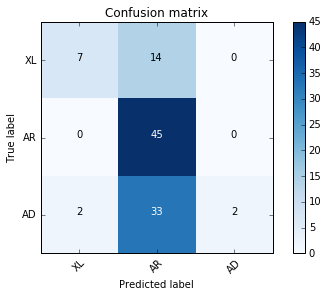

In [412]:
plot_confusion_matrix(cm,['XL','AR','AD'],normalize=False)

In [136]:
df = df.rename(columns={'contradictionXLR':'contraXLR','contradictionAR':'contraAR','contradictionAD':'contraAD'})

In [137]:
# correct for each category
# wrong for each category
xlRows = df.loc[df['Correct_IP'] == 'XL'][['PedigreeId','contraXLR','ansXLR','contraAR','ansAR']]
arRows = df.loc[df['Correct_IP'] == 'AR'][['PedigreeId','contraXLR','ansXLR','contraAR','ansAR']]
adRows = df.loc[df['Correct_IP'] == 'AD'][['PedigreeId','contraAR','ansAR','contraAD','ansAD']]

In [138]:
print(xlRows)

      PedigreeId contraXLR        ansXLR contraAR         ansAR
4     273PA.json        no  1.069273e-12       no  2.672787e-09
5     277DP.json        no  5.662932e-07       no  3.900347e-06
6     302KW.json        no  9.587528e-09       no  5.068931e-08
10   3239PB.json        no  6.416558e-10       no  3.240482e-10
11   3383AT.json       yes  1.119275e-09       no  7.148700e-10
17   3903KA.json        no  2.448162e-12       no  2.771190e-08
25   4958NG.json        no  4.044559e-13       no  6.674773e-15
26   4961BR.json        no  1.095894e-12       no  6.203704e-14
31   5082RH.json        no  4.104687e-11       no  8.119135e-12
33   5191BD.json        no  7.611946e-07       no  5.217452e-06
41   5426JR.json        no  4.329248e-08       no  4.564615e-06
44  55000MB.json        no  6.677686e-11       no  5.548639e-11
45   5500MB.json        no  3.384792e-13       no  3.238353e-11
56   5704AC.json        no  1.428755e-11       no  5.442465e-15
63   5784CV.json        no  9.703851e-06

In [139]:
print(arRows)

        PedigreeId contraXLR        ansXLR contraAR         ansAR
1      2055JS.json        no  5.743621e-10       no  1.099690e-07
2       230KK.json        no  7.800288e-10       no  1.381515e-06
3       235TL.json       yes  7.065115e-07       no  2.484284e-07
7      3061JE.json       yes  2.556063e-06       no  1.221761e-06
12     3464DF.json        no  6.238491e-08       no  5.776723e-07
15      3818J.json       yes  8.729356e-10       no  2.805782e-09
16   3843AH_2.json       yes  1.122739e-06       no  1.032664e-06
19      404KH.json       yes  1.344700e-07       no  2.840333e-06
21     4259DM.json        no  4.896725e-10       no  1.936371e-06
22     4515JN.json       yes  1.203633e-10       no  1.468243e-08
23     4547PB.json        no  2.050898e-10       no  5.919172e-07
27     4984TC.json       yes  8.366614e-11       no  5.492966e-07
28     4994BD.json        no  3.037697e-10       no  1.878942e-08
29     5034MM.json        no  2.030830e-08       no  6.871270e-06
30     503

In [140]:
print(adRows)

        PedigreeId contraAR         ansAR contraAD         ansAD
0      1084LN.json       no  1.810422e-15      yes  1.006181e-25
9      3235JW.json       no  5.376931e-15      yes  2.169907e-12
13     3738KW.json       no  1.883920e-10      yes  1.940948e-07
14     3743MH.json       no  7.863808e-09      yes  3.030145e-08
18     3935SC.json       no  5.788849e-10      yes  8.931037e-18
20      417CP.json       no  3.625299e-05       no  5.874868e-09
24     4954DK.json       no  3.030570e-07      yes  1.786997e-06
32     5092AD.json       no  1.176067e-09      yes  5.610173e-19
35     5248RH.json       no  1.319170e-09      yes  2.943016e-08
36     5263TS.json       no  1.206105e-07      yes  1.315832e-09
37     5359MH.json       no  8.639353e-11      yes  5.309343e-10
38     5377KD.json       no  1.606193e-07      yes  6.422272e-05
39     5393JR.json       no  1.022137e-07      yes  2.871317e-06
47     5571JF.json       no  4.698445e-08      yes  6.618741e-06
49     5633JK.json       

In [155]:
correctIndices = xlRows[xlRows['ansXLR'] > xlRows['ansAR']].index
xlRows['ye'] = [1 if x in correctIndices and y != 'yes' else '_' for x,y in zip(xlRows.index,xlRows.contraXLR)]
xlRows['XLR>AR'] = [1 if x in correctIndices else '_' for x in xlRows.index]
xlRows['diff'] = abs(xlRows['ansXLR']-xlRows['ansAR'])/xlRows['ansXLR']
print(xlRows[['PedigreeId','contraXLR','ansXLR','contraAR','ansAR','ye','XLR>AR']])

      PedigreeId contraXLR        ansXLR contraAR         ansAR ye XLR>AR
4     273PA.json        no  1.069273e-12       no  2.672787e-09  _      _
5     277DP.json        no  5.662932e-07       no  3.900347e-06  _      _
6     302KW.json        no  9.587528e-09       no  5.068931e-08  _      _
10   3239PB.json        no  6.416558e-10       no  3.240482e-10  1      1
11   3383AT.json       yes  1.119275e-09       no  7.148700e-10  _      1
17   3903KA.json        no  2.448162e-12       no  2.771190e-08  _      _
25   4958NG.json        no  4.044559e-13       no  6.674773e-15  1      1
26   4961BR.json        no  1.095894e-12       no  6.203704e-14  1      1
31   5082RH.json        no  4.104687e-11       no  8.119135e-12  1      1
33   5191BD.json        no  7.611946e-07       no  5.217452e-06  _      _
41   5426JR.json        no  4.329248e-08       no  4.564615e-06  _      _
44  55000MB.json        no  6.677686e-11       no  5.548639e-11  1      1
45   5500MB.json        no  3.384792e-

In [159]:
correctIndices = arRows[arRows['ansAR'] > arRows['ansXLR']].index
arRows['ye'] = [1 if x in correctIndices and y != 'yes' else '_' for x,y in zip(arRows.index,arRows.contraAR)]
arRows['AR>XLR'] = [1 if x in correctIndices else '_' for x in arRows.index]
arRows['diff'] = abs(arRows['ansAR']-arRows['ansXLR'])/arRows['ansAR']
print(arRows[['PedigreeId','contraXLR','ansXLR','contraAR','ansAR','ye','AR>XLR']])

        PedigreeId contraXLR        ansXLR contraAR         ansAR ye AR>XLR
1      2055JS.json        no  5.743621e-10       no  1.099690e-07  1      1
2       230KK.json        no  7.800288e-10       no  1.381515e-06  1      1
3       235TL.json       yes  7.065115e-07       no  2.484284e-07  _      _
7      3061JE.json       yes  2.556063e-06       no  1.221761e-06  _      _
12     3464DF.json        no  6.238491e-08       no  5.776723e-07  1      1
15      3818J.json       yes  8.729356e-10       no  2.805782e-09  1      1
16   3843AH_2.json       yes  1.122739e-06       no  1.032664e-06  _      _
19      404KH.json       yes  1.344700e-07       no  2.840333e-06  1      1
21     4259DM.json        no  4.896725e-10       no  1.936371e-06  1      1
22     4515JN.json       yes  1.203633e-10       no  1.468243e-08  1      1
23     4547PB.json        no  2.050898e-10       no  5.919172e-07  1      1
27     4984TC.json       yes  8.366614e-11       no  5.492966e-07  1      1
28     4994B

In [157]:
correctIndices = adRows[adRows['ansAD'] > adRows['ansAR']].index
adRows['ye'] = [1 if x in correctIndices and y != 'yes' else '_' for x,y in zip(adRows.index,adRows.contraAD)]
adRows['AD>AR'] = [1 if x in correctIndices else '_' for x in adRows.index]
adRows['diff'] = abs(adRows['ansAD']-adRows['ansAR'])/adRows['ansAD']
print(adRows[['PedigreeId','contraAR','ansAR','contraAD','ansAD','ye','AD>AR']])

        PedigreeId contraAR         ansAR contraAD         ansAD ye AD>AR
0      1084LN.json       no  1.810422e-15      yes  1.006181e-25  _     _
9      3235JW.json       no  5.376931e-15      yes  2.169907e-12  _     1
13     3738KW.json       no  1.883920e-10      yes  1.940948e-07  _     1
14     3743MH.json       no  7.863808e-09      yes  3.030145e-08  _     1
18     3935SC.json       no  5.788849e-10      yes  8.931037e-18  _     _
20      417CP.json       no  3.625299e-05       no  5.874868e-09  _     _
24     4954DK.json       no  3.030570e-07      yes  1.786997e-06  _     1
32     5092AD.json       no  1.176067e-09      yes  5.610173e-19  _     _
35     5248RH.json       no  1.319170e-09      yes  2.943016e-08  _     1
36     5263TS.json       no  1.206105e-07      yes  1.315832e-09  _     _
37     5359MH.json       no  8.639353e-11      yes  5.309343e-10  _     1
38     5377KD.json       no  1.606193e-07      yes  6.422272e-05  _     1
39     5393JR.json       no  1.022137e

In [161]:
df2 = pd.read_csv('/Users/Eddie/kec-bot/PatientRecords.csv')

In [196]:
df = df.rename(columns={'PedigreeId': 'Patient ID'})

In [209]:
newDf = pd.merge(df, df2, how='inner', on=['Patient ID'])

In [213]:
data = newDf[['Patient ID','Correct_IP','contraXLR','ansXLR','contraAR','ansAR','contraAD','ansAD','Affected Family Members','More Than One Affected Generation','Affected Male with Affected Son','Affected Male with Affected Daughter','Skipping of Females Only','Only Siblings Affected','Males and Females Affected','Any Male with Age of Onset <= 20 Years','Any Female with Asymmetric Diease','Any Female with Less Severe/Asymmetric/Later Onset','Incomplete Penetrance','Consanguinity']]

In [249]:
yMapper = {'AD':0,'AR':1,'XL':2}
y = np.array([yMapper[x] for x in data['Correct_IP']])

In [250]:
yesNo = {'yes':1,'no':0,'Yes':1,'No':0}
x = []
for i,row in data.iterrows():
    currentRow = [yesNo[_x] if _x=='yes' or _x=='no' or _x=='Yes' or _x=='No' else _x for _x in row.tolist()[2:]]
    x.append(currentRow)

In [277]:
from sklearn.model_selection import train_test_split

In [320]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [321]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier

In [322]:
clf = classifier(n_estimators=500)
clf = clf.fit(X_train, y_train)

In [323]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(clf.score(x,y))

0.973684210526
0.8
0.9375


Normalized confusion matrix
[[ 0.91428571  0.08571429  0.        ]
 [ 0.02380952  0.97619048  0.        ]
 [ 0.10526316  0.          0.89473684]]


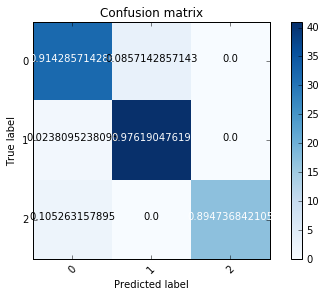

In [334]:
predY = clf.predict(x)
cm2 = confusion_matrix(y,predY,labels=[0,1,2])
plot_confusion_matrix(cm2,[0,1,2],normalize=True)

Normalized confusion matrix
[[ 0.71428571  0.28571429  0.        ]
 [ 0.11111111  0.88888889  0.        ]
 [ 0.25        0.          0.75      ]]


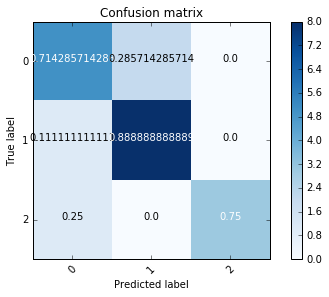

In [333]:
predY = clf.predict(X_test)
cm2 = confusion_matrix(y_test,predY,labels=[0,1,2])
plot_confusion_matrix(cm2,[0,1,2],normalize=True)

In [406]:
tData = [[0.001, 6.6779192625298862e-12, 4.0369381058664964e-20],
[0.005995, 3.809208460692893e-10, 7.7119746745692619e-18],
[0.01099, 2.7872328753459518e-10, 2.9410381362307205e-17],
[0.015985, 3.5246798712674964e-10, 5.0430243833288193e-17],
[0.02098, 1.1245170453936285e-11, 1.9897361024917895e-16],
[0.025975, 4.8725463730982041e-11, 7.0940426557241719e-15],
[0.03097, 1.1242545680272676e-10, 1.0798967874923153e-14],
[0.035965, 3.227952046479703e-11, 6.6674625308441396e-15],
[0.04096, 5.9623068030168142e-12, 2.1282779255113183e-14],
[0.045955, 1.0271092943506108e-11, 1.3252143430705199e-15],
[0.05095, 3.9517226230014414e-11, 1.2969226302484048e-16],
[0.055945, 3.1283983080179578e-10, 1.4773944796233418e-13],
[0.06094, 2.160229283439014e-15, 4.7243685789933789e-15],
[0.065935, 4.4829236980452718e-12, 1.0421102180140626e-14],
[0.07093, 9.2372939942803195e-12, 5.8315251990574621e-14],
[0.075925, 1.3271134364698307e-11, 4.1065047465392558e-16],
[0.08092, 5.2074756373515616e-10, 1.0680256388569521e-13],
[0.085915, 2.3616311619715852e-12, 1.6688702455248947e-13],
[0.09091, 1.0102568572902274e-10, 1.3616985884488246e-12],
[0.095905, 4.9694498010082579e-12, 3.4697514503072012e-13],
[0.1009, 1.275832597678253e-09, 3.4303643932764157e-14],
[0.105895, 7.3885120941013257e-11, 6.0004176898658378e-12],
[0.11089, 1.0282851173880758e-10, 3.2722602890724007e-13],
[0.115885, 3.1755469118898771e-13, 2.5892594453331648e-13],
[0.12088, 1.0496715580289341e-11, 5.7821890047571229e-14],
[0.125875, 6.7505677150258771e-12, 7.6758351917857524e-13],
[0.13087, 2.165055217664804e-10, 8.4526155837613063e-14],
[0.135865, 5.3380985760146309e-10, 7.2655465112664793e-12],
[0.14086, 3.0718071231172867e-11, 1.9223550709919481e-14],
[0.145855, 1.8887485306996683e-10, 4.8791000755077536e-11],
[0.15085, 2.1822458426918137e-09, 8.8630812736040069e-13],
[0.155845, 1.8215147789371264e-10, 3.6769505108472882e-12],
[0.16084, 8.5039416680628103e-11, 4.7878513539239372e-13],
[0.165835, 1.6634147510675196e-09, 4.0789009600669615e-11],
[0.17083, 1.4634301292043195e-11, 8.8300881102625755e-12],
[0.175825, 2.5074200105232591e-10, 3.2955581417748792e-13],
[0.18082, 2.6460414846398233e-11, 8.0619421270531086e-14],
[0.185815, 1.8646739249600135e-10, 4.5678929581819394e-12],
[0.19081, 1.2947560321537095e-11, 8.1278389210593415e-12],
[0.195805, 5.1259011313933016e-12, 1.0736599461902715e-11],
[0.2008, 2.3129401912202099e-10, 8.4281533424112162e-12],
[0.205795, 4.3037147359952732e-10, 8.0237007447707906e-13],
[0.21079, 1.7421261167805342e-10, 1.648770118238109e-14],
[0.215785, 1.3143859259747796e-09, 1.6386988117380697e-12],
[0.22078, 2.6653092045244825e-12, 6.521829144556178e-12],
[0.225775, 6.1375670234837294e-10, 9.4177190035932005e-14],
[0.23077, 3.5609702910444732e-11, 9.6834167279167528e-14],
[0.235765, 2.1211467482966939e-10, 6.1979807052175607e-11],
[0.24076, 4.7939346620449723e-11, 8.0358992955353332e-13],
[0.245755, 1.3166824757933587e-09, 1.6356803274543561e-12],
[0.25075, 1.6906191771546249e-11, 2.4190064418343081e-10],
[0.255745, 2.2075477113055948e-10, 3.2416048184481164e-11],
[0.26074, 5.4107084650532107e-11, 7.0122013247336236e-11],
[0.265735, 6.0956362100151368e-12, 8.153581787839064e-12],
[0.27073, 1.176242678298268e-12, 2.3515470757721285e-10],
[0.275725, 1.3995996735383192e-10, 6.0727808363535806e-11],
[0.28072, 5.1194589804473333e-10, 1.4252197626322502e-11],
[0.285715, 1.3690753828131789e-09, 7.1158086050783483e-13],
[0.29071, 2.8768949403053969e-11, 1.0174552770126122e-09],
[0.295705, 7.6545284951890499e-10, 7.0220169941411919e-12],
[0.3007, 8.9034105087484017e-11, 2.5916437764209887e-12],
[0.305695, 4.0788145507110388e-09, 3.3540244964829159e-13],
[0.31069, 1.7316267408732906e-11, 4.7732016200806656e-11],
[0.315685, 3.1296483862392231e-10, 5.7273797150967461e-11],
[0.32068, 2.0663706816625045e-11, 5.9505322905785871e-12],
[0.325675, 3.4935270722361068e-10, 1.9020548221332118e-11],
[0.33067, 6.791839305946201e-13, 5.4705090298224074e-10],
[0.335665, 1.0840916385794931e-09, 3.9217553669135333e-11],
[0.34066, 6.8162490950945563e-11, 7.6786424613240342e-12],
[0.345655, 3.5068406543934596e-10, 2.0243205025449751e-11],
[0.35065, 1.072779760531856e-10, 6.5916753981376943e-12],
[0.355645, 1.5075250714933707e-10, 1.9635683376121986e-11],
[0.36064, 8.0690690232202593e-11, 1.761652954844791e-11],
[0.365635, 1.8021670143039805e-09, 3.2216262154968611e-10],
[0.37063, 8.3947764900129887e-12, 9.7665975115656878e-11],
[0.375625, 1.7826381084367579e-09, 8.7901807551023733e-11],
[0.38062, 3.0213675111876223e-11, 5.5688027949938683e-10],
[0.385615, 1.15975034576875e-10, 5.1274048498900146e-12],
[0.39061, 2.093727197017329e-10, 3.0044765672699804e-11],
[0.395605, 6.3259516087284177e-11, 5.5774748658698145e-11],
[0.4006, 1.6645908915937441e-10, 3.5312107231402725e-13],
[0.405595, 2.0730850639637888e-10, 2.6374694411509605e-11],
[0.41059, 1.2134862668931428e-09, 3.4141881217936461e-10],
[0.415585, 2.6617915329855903e-10, 2.7516758954146862e-10],
[0.42058, 2.765180868476239e-10, 4.5399742612872042e-11],
[0.425575, 1.2879775968529121e-08, 1.2526913792622747e-12],
[0.43057, 8.7302745859417379e-11, 8.8720469110378538e-13],
[0.435565, 2.1833997641939422e-10, 8.1280449039720279e-11],
[0.44056, 1.8325441211684788e-09, 7.8250779820854066e-10],
[0.445555, 6.2409393559481598e-11, 2.637127626426527e-12],
[0.45055, 1.2179466710531758e-10, 1.7566598516566847e-12],
[0.455545, 2.5257555585430399e-10, 2.9624528085535387e-11],
[0.46054, 7.7043263851282032e-10, 3.495379717928177e-11],
[0.465535, 1.3426474752496378e-10, 6.7989889747681379e-11],
[0.47053, 1.3899054284820284e-09, 7.4099644057854827e-12],
[0.475525, 2.8481881047428775e-12, 2.3063584729095655e-10],
[0.48052, 2.3577324828307003e-09, 5.4812325970996769e-12],
[0.485515, 2.0208619969311446e-11, 1.542748384335582e-10],
[0.49051, 1.4717043559286548e-09, 9.0620528093159175e-11],
[0.495505, 6.924270945687303e-10, 5.5139752319887474e-13],
[0.5005, 1.4249035999306866e-09, 1.0971256443358913e-11],
[0.505495, 1.3586028914268649e-09, 4.0678579773257912e-13],
[0.51049, 3.3771154697346742e-10, 3.0175531686535324e-11],
[0.515485, 3.2652065157459666e-11, 2.1356326984160884e-10],
[0.52048, 1.2957769481843351e-09, 1.5230480008642841e-12],
[0.525475, 1.2602981733213006e-09, 3.0246531257193695e-10],
[0.53047, 1.6533158219791122e-09, 3.3605627865320892e-12],
[0.535465, 5.2503631149035321e-10, 1.1827276513748678e-11],
[0.54046, 3.757972215637893e-10, 4.1143515674188782e-11],
[0.545455, 7.1694425942388414e-12, 3.0639962016440177e-11],
[0.55045, 1.5119687179543457e-10, 1.6237361381758606e-09],
[0.555445, 1.1015275393098036e-10, 8.4628060328012282e-11],
[0.56044, 2.7876340195728544e-10, 1.1148402776507177e-10],
[0.565435, 6.1151204408792357e-10, 1.474412738752041e-10],
[0.57043, 8.3629815288477393e-11, 9.4260555933886695e-12],
[0.575425, 1.8785442492439698e-11, 5.3568582120143232e-11],
[0.58042, 8.5334875811046398e-13, 5.0736589834578237e-11],
[0.585415, 3.1383917133152046e-09, 6.9272999718233381e-11],
[0.59041, 6.4480310432639567e-10, 1.8486618159121234e-10],
[0.595405, 2.5228880361161063e-09, 1.1808890332344621e-11],
[0.6004, 5.8963055315959702e-10, 1.6746694448905768e-10],
[0.605395, 7.7808219946631878e-11, 1.1947457465764606e-10],
[0.61039, 1.6700701015004531e-09, 8.0892490556872794e-11],
[0.615385, 1.4611744273514625e-12, 7.9187304083898288e-11],
[0.62038, 1.1579866757528088e-09, 2.5678805890908562e-11],
[0.625375, 4.8260756986609086e-09, 2.5385251016326423e-11],
[0.63037, 1.1652964675209154e-09, 2.2280083309728483e-11],
[0.635365, 1.2719514620004096e-09, 1.4910104014828255e-11],
[0.64036, 2.6677453746648382e-09, 2.0223646341597731e-11],
[0.645355, 2.2889295350958985e-10, 7.1854421163105223e-12],
[0.65035, 5.1604284968735707e-11, 3.0997172311278603e-10],
[0.655345, 1.4423451151059037e-10, 2.5874772763596494e-10],
[0.66034, 1.0945551303547421e-10, 1.1833850985793084e-11],
[0.665335, 7.5491618952944668e-11, 2.3872066634211319e-11],
[0.67033, 5.1102254129347248e-09, 1.7468495829130669e-10],
[0.675325, 5.4223893386275197e-10, 7.2137837839155616e-10],
[0.68032, 1.7822737348025552e-09, 5.225307999630317e-11],
[0.685315, 1.3326424797683324e-10, 5.1300421616097629e-12],
[0.69031, 7.4459489821681196e-11, 4.1759715414629849e-11],
[0.695305, 4.2623769596199223e-11, 7.7106688216201806e-10],
[0.7003, 4.1242116818927036e-10, 1.0303582385337049e-09],
[0.705295, 4.0813317673520546e-10, 1.6356616758309001e-10],
[0.71029, 3.6892391463697869e-09, 6.9221177939447918e-10],
[0.715285, 7.7132816672448354e-09, 2.480244001980291e-10],
[0.72028, 2.23995201567125e-10, 1.106054716567503e-11],
[0.725275, 5.5993495185935775e-10, 3.452586256090437e-09],
[0.73027, 6.5998885445061208e-11, 9.8967659197479827e-11],
[0.735265, 7.2210810103336289e-12, 2.5014160992798288e-10],
[0.74026, 5.6307338664576277e-10, 1.535509376186613e-10],
[0.745255, 3.0585444526756918e-10, 2.4813885579571174e-12],
[0.75025, 1.5863208869185344e-10, 1.5352453172303421e-09],
[0.755245, 4.8627786097362051e-10, 6.8667453032411825e-12],
[0.76024, 5.2005377036746415e-10, 1.5812686853510862e-12],
[0.765235, 6.6201184469580068e-11, 3.6008875753100259e-11],
[0.77023, 1.3421273001552715e-09, 3.3380249838164889e-10],
[0.775225, 7.0374750560585252e-11, 2.0049357365721262e-11],
[0.78022, 5.6805864764515678e-10, 2.4532081051994832e-11],
[0.785215, 1.6579473939624435e-09, 1.2740264298193233e-11],
[0.79021, 1.7407714851958465e-09, 1.0386962879592434e-11],
[0.795205, 9.2469855209267449e-10, 3.0775989788342972e-09],
[0.8002, 1.1927838116446307e-11, 8.9118170849398667e-10],
[0.805195, 8.8064397143281643e-11, 3.3985090883454454e-10],
[0.81019, 6.3225042946872207e-10, 2.0784496719756323e-11],
[0.815185, 7.3511743675529149e-11, 7.126218521797245e-12],
[0.82018, 3.8097683364478469e-10, 4.4313244585785094e-11],
[0.825175, 8.2994392443466573e-10, 4.7647368240488997e-10],
[0.83017, 1.5385848568233418e-10, 1.3206456813365906e-11],
[0.835165, 8.1419182730762062e-10, 5.2303294177089336e-10],
[0.84016, 9.8832469650964356e-11, 2.8149105431633333e-11],
[0.845155, 1.6677610192062546e-10, 6.6945434078123047e-12],
[0.85015, 5.5290018092560094e-10, 1.7399609196696864e-11],
[0.855145, 9.3036543484930276e-11, 1.8056853010725733e-10],
[0.86014, 6.1783326764067119e-11, 1.0252777845594669e-09],
[0.865135, 3.1838926693531251e-10, 1.3750963410552207e-10],
[0.87013, 2.9656391113617698e-10, 1.0212355072283586e-09],
[0.875125, 4.5330071424591934e-11, 3.2224407249890149e-11],
[0.88012, 1.2006637657092451e-10, 4.6383528129737203e-10],
[0.885115, 6.696620831557713e-11, 4.512407837101374e-11],
[0.89011, 3.6966748719990094e-10, 7.1196976597409661e-11],
[0.895105, 1.6287153100788516e-10, 4.3655447308609483e-11],
[0.9001, 7.2979911599392992e-12, 9.094702667964576e-12],
[0.905095, 4.5955640766711512e-11, 5.4455176955006421e-11],
[0.91009, 1.6018871584107277e-11, 1.3441020275698661e-10],
[0.915085, 2.2303689426933121e-10, 4.0179116930707427e-12],
[0.92008, 1.9425353777358429e-10, 9.3979905195771076e-12],
[0.925075, 2.3930632550107721e-10, 2.3911448295189022e-13],
[0.93007, 2.0179085807811149e-10, 1.9503241640115815e-11],
[0.935065, 1.4971758003470373e-11, 2.9011987344592081e-11],
[0.94006, 1.4616346126599506e-10, 1.1281940237526085e-11],
[0.945055, 2.1868206294713705e-11, 6.8556083958077978e-12],
[0.95005, 4.3068407955703096e-10, 1.2054871585104355e-11],
[0.955045, 6.9208631880282347e-12, 1.7402926342520776e-10],
[0.96004, 4.7394726512577335e-12, 5.4878262489118995e-12],
[0.965035, 4.2539587530037407e-12, 4.5843695764730513e-11],
[0.97003, 2.5483957938019239e-12, 6.5611958300799819e-12],
[0.975025, 1.302774358391874e-11, 1.5456660530475979e-11],
[0.98002, 5.0925896801756048e-11, 4.9357732658927293e-12],
[0.985015, 2.094496439322732e-12, 2.6319968585365995e-12],
[0.99001, 4.7261120258245326e-13, 1.3046747865570513e-11],
[0.995005, 4.4606486759361585e-13, 3.7443811657478468e-13],
[1.0, 1.2152449539482494e-09, 7.5817219302104551e-12]]


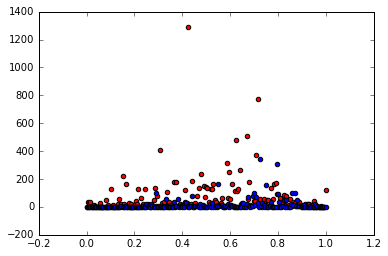

In [407]:
plt.scatter([x[0] for x in tData],[x[1]*10**11 for x in tData],c='r')
plt.scatter([x[0] for x in tData],[x[2]*10**11 for x in tData],c='b')
plt.show()

In [408]:
cumulativeAR = [0]
cumulativeAD = [0]
for i,x in enumerate(tData):
    cumulativeAR.append(cumulativeAR[i]+x[1])
    cumulativeAD.append(cumulativeAD[i]+x[2])

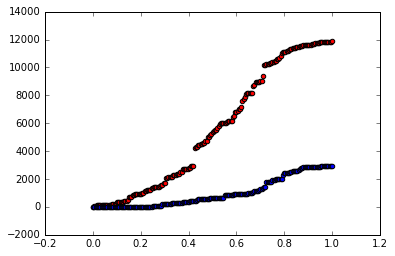

In [409]:
plt.scatter([x[0] for x in tData],[x*10**11 for x in cumulativeAR[1:]],c='r')
plt.scatter([x[0] for x in tData],[x*10**11 for x in cumulativeAD[1:]],c='b')
plt.show()

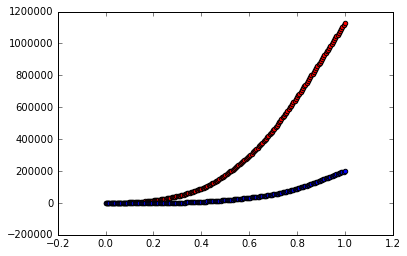

In [410]:
import scipy
plt.scatter([x[0] for x in tData],[scipy.integrate.simps(np.array(cumulativeAR[1:i+2]))*10**11 for i,x in enumerate(cumulativeAR[1:])],c='r')
plt.scatter([x[0] for x in tData],[scipy.integrate.simps(np.array(cumulativeAD[1:i+2]))*10**11 for i,x in enumerate(cumulativeAD[1:])],c='b')
plt.show()